In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge
from sklearn.preprocessing import PolynomialFeatures

In [45]:
def regression(model, x_train, y_train, x_test, y_test) :
    std = StandardScaler().fit(x_train)
    regr_type = model.fit(std.transform(x_train),y_train)
    y_predicited = regr_type.predict(std.transform(x_test))
    return y_predicited,regr_type.score(std.transform(x_train),y_train), regr_type.score(std.transform(x_test),y_test), regr_type.coef_   

In [48]:
#np.random.seed(0)
x = 2 - np.linspace(-5,5,num=60) *4 #generate the X data  
y = x - 0.2 * (x ** 2) + 0.05 * (x ** 3)  + np.random.normal(-110, 110, size=x.size) +2 #generate target points y

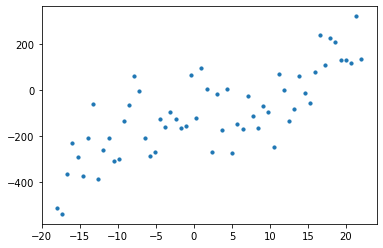

In [49]:
x = x[:, np.newaxis]
y = y[:, np.newaxis]
plt.scatter(x,y, s=10)
plt.show()

0.5852125947541605

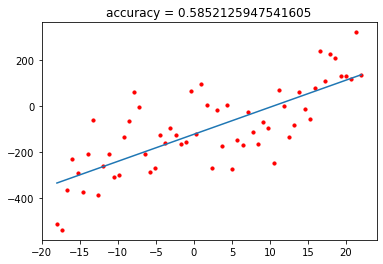

In [50]:
y_pred, score,score_test, coef = regression(LinearRegression(), x, y, x, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))
score

In [51]:
def polynomial_convert(X,degree):
    '''
    X : like array 
       dataset
    degree : int 
       number of powers
    '''
    return PolynomialFeatures(degree=degree).fit_transform(X)   
   

Text(0.5, 1.0, 'accuracy = 0.7106718103902038')

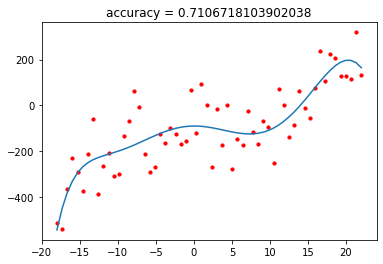

In [54]:
x_poly = polynomial_convert(x, 7)
y_pred, score, score_Test,coef = regression(LinearRegression(), x_poly, y, x_poly, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))

<ipython-input-2-45b93e132574>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  regr_type = model.fit(std.transform(x_train),y_train)
C:\Users\dstan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\dstan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273400.5036067288, tolerance: 188.96422557099356
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'accuracy = 0.7106325255157744')

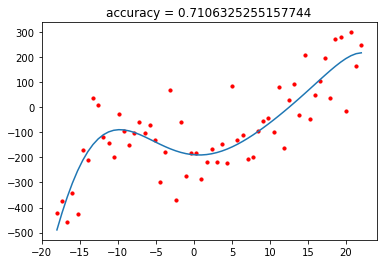

In [8]:
y_pred, score, coef = regression( Lasso(alpha=0), x_poly, y, x_poly, y)
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.title('accuracy = {}'.format(score))

In [9]:
10e+0

10.0

In [10]:
y_pred, score, coef = regression(LinearRegression(), x_poly, y, x_poly, y)
weights = np.array([])
alphas = [10e-4,10e-3,10e-2,10e-1,1]
print(weights.shape)
for alpha in alphas:
    y_pred, score, score_test,coef = regression( Lasso(alpha=alpha), x_poly, y, x_poly, y)
    if weights.shape[0]>0 : 
        weights = np.vstack([weights,coef])
    else :
        weights = coef
weights = weights.T   


(0,)


C:\Users\dstan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270138.2793862185, tolerance: 188.96422557099356
  model = cd_fast.enet_coordinate_descent(
C:\Users\dstan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241243.79768021867, tolerance: 188.96422557099356
  model = cd_fast.enet_coordinate_descent(
C:\Users\dstan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23025.18795258319, tolerance: 188.96422557099356
  model = cd_fast.enet_coordinate_descent(


In [11]:
weights[1,:]

array([-29.48764275, -29.70014876, -31.73760823,  -8.18923323,
        -8.18923323])

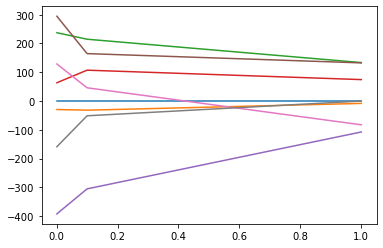

In [12]:

for i in range(weights.shape[0]):
    plt.plot(np.array(alphas),(weights[i,:]))


In [13]:
print(weights)

[[   0.            0.            0.            0.            0.        ]
 [ -29.48764275  -29.70014876  -31.73760823   -8.18923323   -8.18923323]
 [ 237.5492412   235.40156375  214.86135736  133.6891215   133.6891215 ]
 [  63.53154889   67.59869327  107.27623202   74.53354083   74.53354083]
 [-392.31235146 -384.10692224 -305.26206624 -107.54693661 -107.54693661]
 [ 294.72375566  282.64282907  164.83290331  132.64512778  132.64512778]
 [ 128.83382686  121.05132373   46.05562608  -82.57064499  -82.57064499]
 [-158.72103379 -148.7162198   -51.29574703    0.            0.        ]]


In [14]:
y_pred, score, coef = regression(LinearRegression(), x_poly, y, x_poly, y)
weights = np.array([])
alphas = [1,10,100,1000]
print(weights.shape)
for alpha in alphas:
    y_pred, score, coef = regression( Lasso(alpha=alpha), x_poly, y, x_poly, y)
    if weights.shape[0]>0 : 
        weights = np.vstack([weights,coef])
    else :
        weights = coef
weights = weights.T   

(0,)


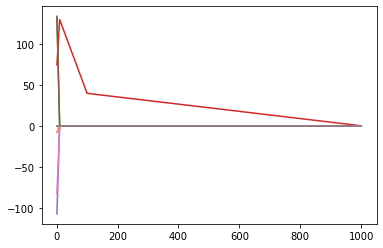

In [15]:

for i in range(weights.shape[0]):
    plt.plot(np.array(alphas),(weights[i,:]))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.33, random_state=42)

In [58]:
weights = np.array([])
alphas = [10e-4,10e-3,10e-2,10e-1,10,100,1000]
scores =[]
scores_test = []
print(weights.shape)
for alpha in alphas:
    y_pred, score, score_test, coef = regression( Lasso(alpha=alpha), X_train, y_train, X_test, y_test)
    scores.append(score)
    scores_test.append(score_test)
    if weights.shape[0]>0 : 
        weights = np.vstack([weights,coef])
    else :
        weights = coef
weights = weights.T   

(0,)


C:\Users\dstan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160488.92158387607, tolerance: 109.67307697796596
  model = cd_fast.enet_coordinate_descent(
C:\Users\dstan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146080.73678494515, tolerance: 109.67307697796596
  model = cd_fast.enet_coordinate_descent(
C:\Users\dstan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43412.5921095869, tolerance: 109.67307697796596
  model = cd_fast.enet_coordinate_descent(


In [60]:
scores

[0.7042751538121925,
 0.7038888356378301,
 0.6995071139750344,
 0.6834857404645421,
 0.6169759621824067,
 0.2559028429522796,
 0.0]

In [61]:
x=np.linspace(0,1,len(scores))

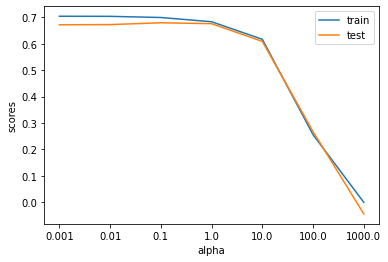

In [64]:
plt.plot(x,scores,label='train')
plt.plot(x,scores_test,label='test')
plt.xlabel('alpha')
plt.ylabel('scores')
plt.xticks(x, np.array(alphas).astype(str))
plt.legend()

In [40]:
a = np.array2string(np.array(alphas), precision=5, separator=',',
                      suppress_small=True)
type(a)

str

<h2> Cross-validation </h2>


In [75]:
y[[1,2,3]]

array([[319.36740168],
       [116.89772695],
       [128.60829297]])

In [67]:
from sklearn.model_selection import KFold

In [71]:
kfold = KFold(3, True, 1)
# enumerate splits
for train, test in kfold.split(x_poly):
    print('train: %s, test: %s' % (train, test))

train: [ 0  1  4  5  6  7  8  9 11 12 13 14 15 16 17 18 20 22 23 25 28 29 30 31
 32 34 37 38 42 43 45 47 49 51 54 55 56 57 58 59], test: [ 2  3 10 19 21 24 26 27 33 35 36 39 40 41 44 46 48 50 52 53]
train: [ 0  1  2  3  5  6  7  8  9 10 11 12 15 16 18 19 20 21 24 25 26 27 33 35
 36 37 39 40 41 43 44 45 46 48 50 52 53 57 58 59], test: [ 4 13 14 17 22 23 28 29 30 31 32 34 38 42 47 49 51 54 55 56]
train: [ 2  3  4 10 13 14 17 19 21 22 23 24 26 27 28 29 30 31 32 33 34 35 36 38
 39 40 41 42 44 46 47 48 49 50 51 52 53 54 55 56], test: [ 0  1  5  6  7  8  9 11 12 15 16 18 20 25 37 43 45 57 58 59]
